#### Impedindo notebook de escrever bytecode

In [1]:
import sys
sys.dont_write_bytecode = True

#### Inserindo caminho dos módulos em sys.path

In [2]:
import pathlib
import os
sys.path.append(str(pathlib.Path(os.getcwd()).parent.parent.resolve()))

#### Importando módulos

In [3]:

from modules.point import PointDataset
from modules.classifier import ConvexHullClassifier, KNNClassifier
from random import choices
import pandas as pd
import matplotlib.pyplot as plt

#### Lendo dataset

O dataset contraceptive contém 3 classes. Será feita classificação um contra todos para a classe 1.

In [4]:
dataset = PointDataset("./data.dat", labelTranslation={'1':1, '2':-1, '3':-1})
points = dataset.getPoints()

#### Criando instância do classificador baseado em envoltória convexa para as features (0, 1)

In [5]:
CHclf01 = ConvexHullClassifier(points, coordinate1=0, coordinate2=1, nFolds=5)
CHresults01 = CHclf01.run()

#### Plotando classificador

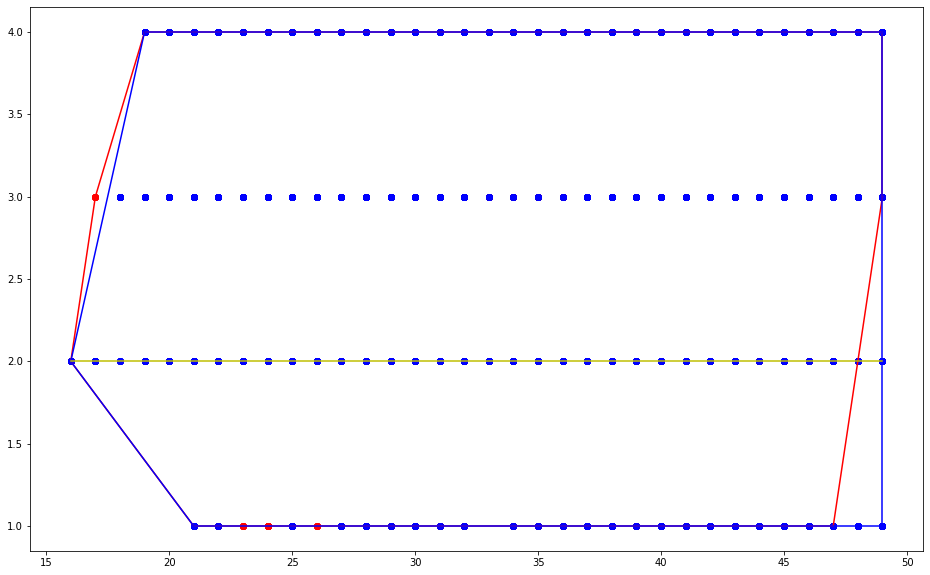

In [6]:
CHclf01.plotHulls()

#### Verificando separabilidade linear dos pontos

In [7]:
CHclf01.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [8]:
CHresults01["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.310811,0.273810,0.310811,0.456311
1,0.393443,0.808989,0.393443,0.378641
2,0.443182,0.795918,0.443182,0.427184
3,0.415789,0.868132,0.415789,0.402913
4,0.380952,0.878049,0.380952,0.383495


#### Resultados do teste

In [9]:
CHresults01["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.38191,0.826087,0.38191,0.371041


#### Criando instância do classificador baseado em envoltória convexa para as features (0, 2)

In [10]:
CHclf02 = ConvexHullClassifier(points, coordinate1=0, coordinate2=2, nFolds=5)
CHresults02 = CHclf02.run()

#### Plotando classificador

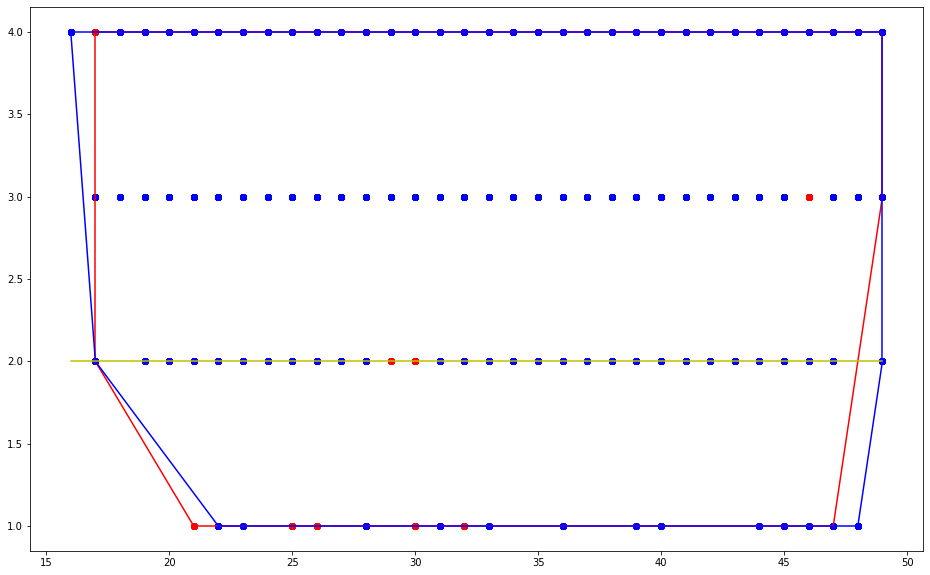

In [11]:
CHclf02.plotHulls()

#### Verificando separabilidade linear dos pontos

In [12]:
CHclf02.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [13]:
CHresults02["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.391534,0.891566,0.391534,0.398058
1,0.379121,0.811765,0.379121,0.373786
2,0.401099,0.839080,0.401099,0.402913
3,0.336898,0.797468,0.336898,0.320388
4,0.392473,0.829545,0.392473,0.378641


#### Resultados do teste

In [14]:
CHresults02["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.441624,0.84058,0.441624,0.427602


#### Criando instância do classificador baseado em envoltória convexa para as features (1, 2)

In [15]:
CHclf12 = ConvexHullClassifier(points, coordinate1=1, coordinate2=2, nFolds=5)
CHresults12 = CHclf12.run()

#### Plotando classificador

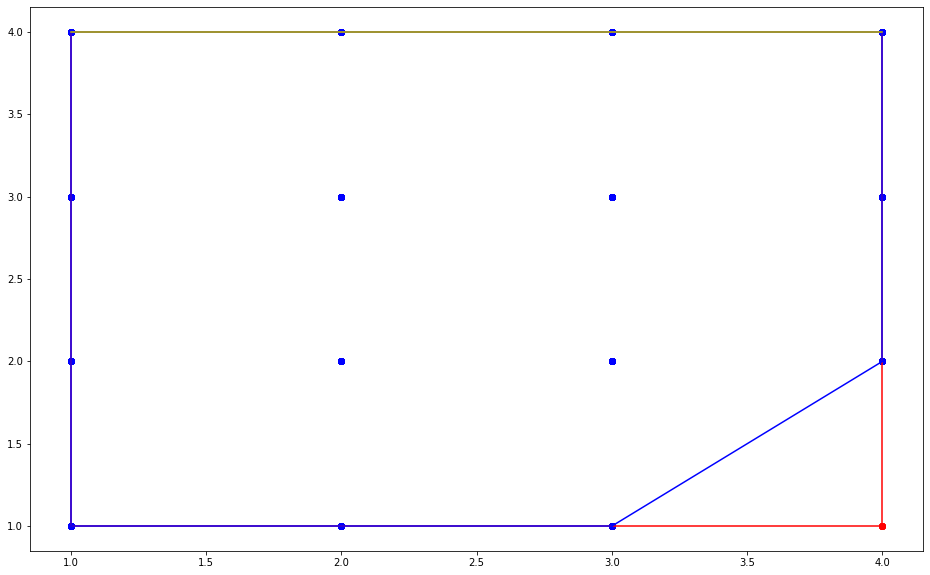

In [16]:
CHclf12.plotHulls()

#### Verificando separabilidade linear dos pontos

In [17]:
CHclf12.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [18]:
CHresults12["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.310811,0.244681,0.310811,0.407767
1,0.341772,0.303371,0.341772,0.446602
2,0.278481,0.258824,0.278481,0.417476
3,0.333333,0.296703,0.333333,0.427184
4,0.337838,0.277778,0.337838,0.446602


#### Resultados do teste

In [19]:
CHresults12["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.268421,0.284916,0.268421,0.395928


#### Criando instância do classificador KNN com otimização iterativa do número de vizinhos

A otimização é feita da seguinte forma: validação cruzada com 5 folds é executada para classificador, variando o número de vizinhos de 1 a _maxK_. É escolhido o número de vizinhos que apresenta a melhor _F1 Score_ média entre os folds. Se _makK_ não for passado, _maxK_ é igual à raíz quadrada do tamanho do dataset.

In [24]:
KNNclf = KNNClassifier(points, maxK=30, nFolds=5)
KNNresults = KNNclf.run()

#### Resultados da validação cruzada com 5 folds

In [25]:
KNNresults["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.656250,0.494118,0.656250,0.684466
1,0.637500,0.593023,0.637500,0.689320
2,0.626506,0.571429,0.626506,0.660194
3,0.692308,0.517241,0.692308,0.699029
4,0.657895,0.537634,0.657895,0.665049


#### Resultados do teste

In [26]:
KNNresults["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.621302,0.561497,0.621302,0.669683
